In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [29]:
import json
import os.path as osp
with open(osp.join('data', 'bbr-08210026', 'bo_80.json'), 'r') as f:
    bos = json.load(f)
with open(osp.join('data', 'udr-large-genet-082010', 'bo_80.json'), 'r') as f:
    bos2 = json.load(f)

In [15]:
bos[0].keys()

dict_keys(['bandwidth', 'delay', 'loss', 'queue', 'T_s', 'weight'])

In [10]:
bws = [x['bandwidth'][0] for x in bos[1:]]

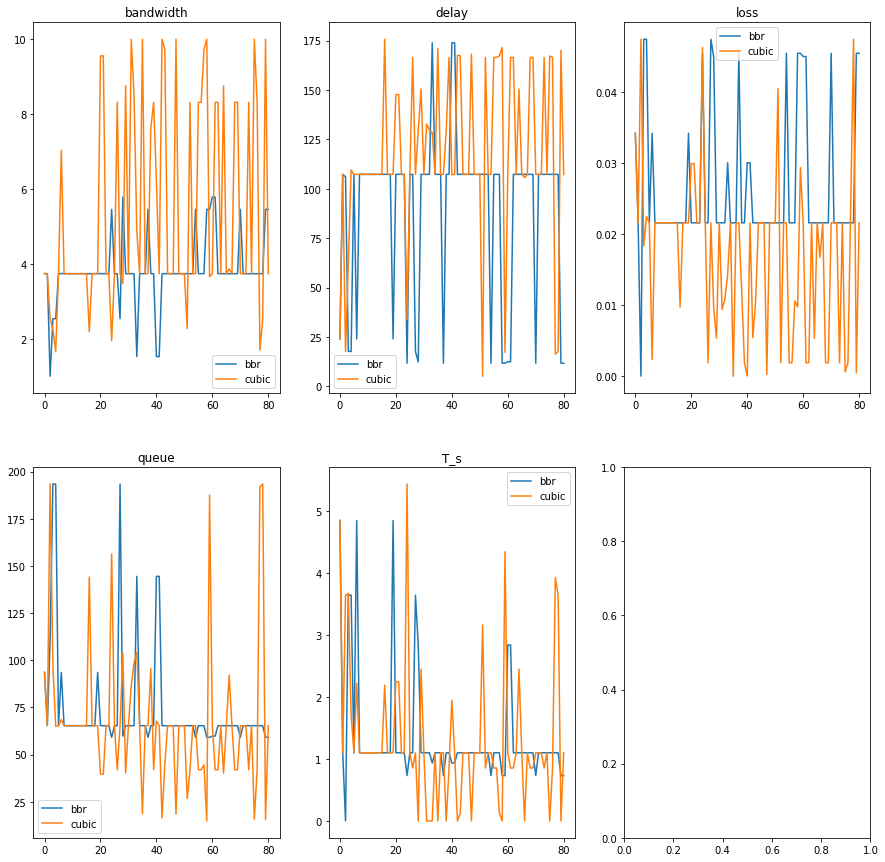

In [31]:
# plt.figure(figsize=(10, 10))
fig, axs = plt.subplots(2, 3)
fig.set_figheight(15)
fig.set_figwidth(15)
for i, key in enumerate(bos[0].keys()):
    if key=='weight':
        continue
    bws = [x[key][0] for x in bos[1:]]
    bws2 = [x[key][0] for x in bos2[1:]]
    axs[i//3, i%3].plot(np.array(bws), label="bbr")
    axs[i//3, i%3].plot(np.array(bws2), label='cubic')
    axs[i//3, i%3].set_title(key)
    axs[i//3, i%3].legend()

In [3]:
val = pd.read_csv('data/udr-large-genet-082001/validation_log_5.csv', delimiter='\t')
test = np.load('figs/result1.npy')

/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


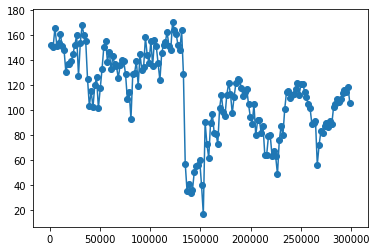

In [14]:
plt.plot(np.arange(1800, 300600, 1800), val['mean_validation_reward'][:-1])
plt.scatter(np.arange(1800, 300600, 1800), val['mean_validation_reward'][:-1])

In [10]:
print(val.shape)

(167, 8)


In [20]:
x = np.arange(7200, 302400, 7200)

In [21]:
x.shape

(41,)

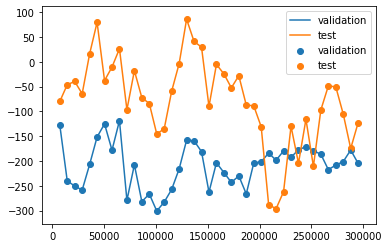

In [23]:
plt.plot(x, val['mean_validation_reward'][:-1], label="validation")
plt.plot(x, test, label="test")
plt.scatter(x, val['mean_validation_reward'][:-1], label="validation")
plt.scatter(x, test, label="test")
plt.legend()